In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Q1: Don't type

Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

In [2]:
a = np.arange(1,16).reshape(3,5).T
print(a)

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


Now create a new array containing only its 2nd and 4th rows.

In [3]:
b = a[[1,3],:]
print(b)

[[ 2  7 12]
 [ 4  9 14]]


Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

In [5]:
n = 7
m = 5

a = np.zeros((n,m), dtype=int)
a[[0,-1],:] = 1
a[:,[0,-1]] = 1
print(a)

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


## Q2: Histrograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook. You download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt (and use python to download a file!)

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

In [2]:
import wget

url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt'
wget.download(url)

100% [................................................................................] 2183 / 2183

'sample (1).txt'

In [5]:
data = np.loadtxt('sample.txt')
print(data.shape)

count, bins = np.histogram(data[:,1])
bins_center = (bins[1:]+bins[:-1])/2
for i in range(bins.shape[0]-1):
    print(f'[{bins[i]:.2f}  {bins[i+1]:.2f}], center = {bins_center[i]:.2f}, count = {count[i]}')

(100, 2)
[-30.59  -23.67], center = -27.13, count = 3
[-23.67  -16.75], center = -20.21, count = 4
[-16.75  -9.83], center = -13.29, count = 9
[-9.83  -2.92], center = -6.37, count = 22
[-2.92  4.00], center = 0.54, count = 22
[4.00  10.92], center = 7.46, count = 22
[10.92  17.84], center = 14.38, count = 9
[17.84  24.76], center = 21.30, count = 7
[24.76  31.68], center = 28.22, count = 1
[31.68  38.59], center = 35.14, count = 1


## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [6]:
def mean(a):
    sum = 0
    for el in a:
        sum += el
    return sum/a.shape[0]

def std(a):
    a_mean = mean(a)
    sq_sum = 0
    for el in a:
        sq_sum += (el-a_mean)**2
    return (sq_sum/a.shape[0])**(1/2)

In [5]:
import time

n_points = np.logspace(1, 8, 20, dtype=int)
trials = 20
time_matteo, time_numpy = [], []
for n in tqdm(n_points):
    tmp_matteo, tmp_numpy = [], []
    for i in range(trials):
        t = np.random.random(n)
        
        start = time.time()
        #std_matteo = std(t)
        std(t)
        tmp_matteo += [time.time()-start]
        
        start = time.time()
        #std_numpy = np.std(t)
        np.std(t)
        tmp_numpy += [time.time()-start]
    time_matteo += [np.mean(tmp_matteo)]
    time_numpy += [np.mean(tmp_numpy)]

  0%|          | 0/20 [00:00<?, ?it/s]

NameError: name 'std' is not defined

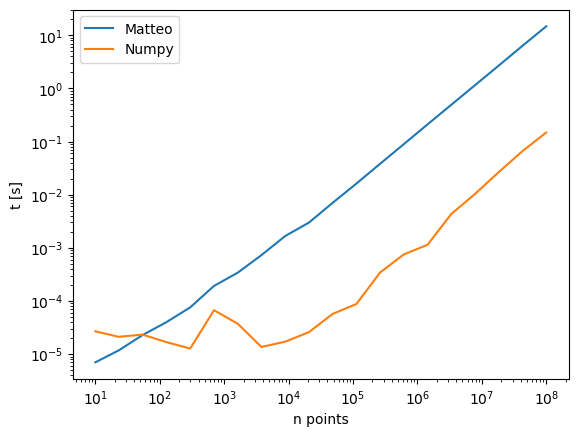

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_points, time_matteo, label='Matteo')
ax.plot(n_points, time_numpy, label='Numpy')
ax.set_xlabel('n points')
ax.set_ylabel('t [s]')
ax.semilogx()
ax.semilogy()
plt.legend()

## Q4: Bootstraps

Boostrapping is a prominent statistical tecnique to estimate errors when you're stuck and don't know what else to do: https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). 

In [2]:
from scipy.stats import powerlaw

In [3]:
outliers = np.concatenate((powerlaw.rvs(2, loc=0, scale=5, size=5000), np.random.uniform(low=-5, high=5, size=12000)))
pop = np.concatenate((np.random.normal(loc=0, scale=1, size=100000), outliers))
np.random.shuffle(pop)

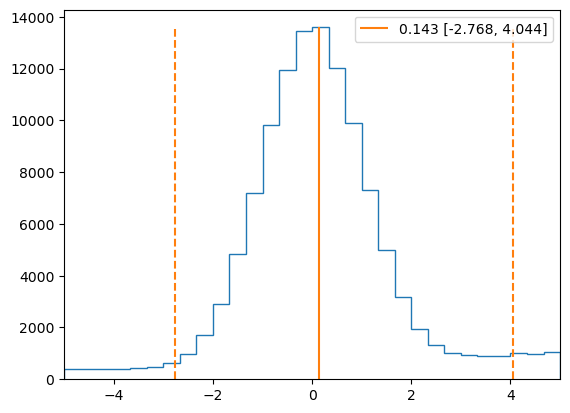

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
counts, bins, patches  = ax.hist(pop, bins=30, histtype='step')
ax.vlines(np.mean(pop), 0, np.max(counts), color='C1', label=f'{np.mean(pop):.3f} [{np.percentile(pop, 2.5):.3f}, {np.percentile(pop, 97.5):.3f}]')
ax.vlines(np.percentile(pop, 2.5), 0, np.max(counts), color='C1', linestyle='--')
ax.vlines(np.percentile(pop, 97.5), 0, np.max(counts), color='C1', linestyle='--')
ax.set_xlim(-5,5)
plt.legend()

In [65]:
n_samples = np.logspace(1, 3, 3, dtype=int)
n_times = 10000
btsp = np.zeros((n_samples.shape[0], 3, n_times))
for i, n in enumerate(n_samples):
    resampled_mean = []
    resampled_0025 = []
    resampled_0975 = []
    for j in range(n_times):
        sample = np.random.choice(pop, n)
        resampled_mean += [np.mean(sample)]
        resampled_0025 += [np.percentile(sample, 2.5)]
        resampled_0975 += [np.percentile(sample, 97.5)]
    btsp[i] = np.stack((resampled_mean, resampled_0025, resampled_0975), axis=0)

Text(0, 0.5, 'mean')

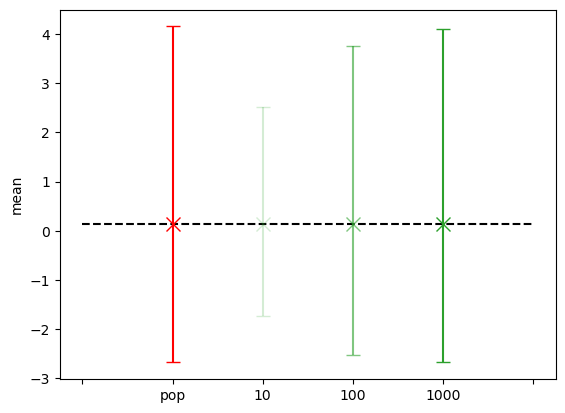

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hlines(np.mean(pop), 0, n_samples.shape[0]+2, color='k', linestyle='--')
ax.errorbar(1, np.mean(pop), yerr=[[np.abs(np.percentile(pop,2.5))], \
                                   [np.abs(np.percentile(pop,97.5))]], c='r', \
            marker='x', markersize=10, capsize=5)
for i, alpha in enumerate(np.linspace(0.2,1,n_samples.shape[0])):
    ax.errorbar(2+i, np.mean(btsp[i,0,:]), yerr=[[np.abs(np.mean(btsp[i,1,:]))], [np.abs(np.mean(btsp[i,2,:]))]], c='C2', \
                alpha=alpha, marker='x', markersize=10, capsize=5)

ax.set_xticks(np.arange(0,n_samples.shape[0]+3), labels=[None]+['pop']+[f'{n_samples[i]}' for i in range(n_samples.shape[0])]+[None])
ax.set_ylabel('mean')

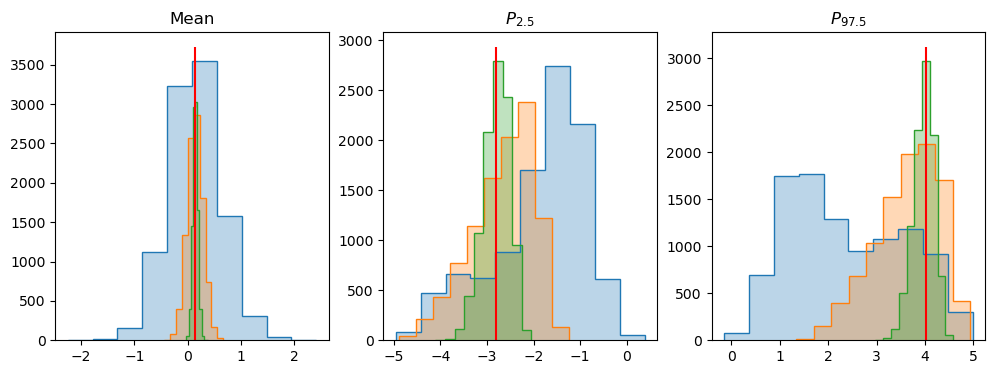

In [83]:
fig = plt.figure(figsize=(12, 4))
axs = fig.subplots(1,3)
pop_values = [np.percentile(pop, 2.5), np.mean(pop), np.percentile(pop, 97.5)]
titles = ['Mean', r'$P_{2.5}$', r'$P_{97.5}$']

for j in range(3):
    for i, samples in enumerate(btsp):
        axs[j].hist(samples[j,:], histtype='step', color=f'C{i}')
        axs[j].hist(samples[j,:], alpha=0.3, color=f'C{i}')
    axs[j].vlines(pop_values[j], 0, axs[j].get_ylim()[1], color='r')
    axs[j].set_title(titles[j])

## Q5: Einstein summation

einsum is a powerful (but often painful) numpy thing:
- https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
- https://stackoverflow.com/questions/26089893/understanding-numpys-einsum

Take 2 vectors A and B. Write the einsum equivalent of inner, outer, sum, and mul function.

In [17]:
a = np.random.random(3)
b = np.random.random(3)

print('Inner product')
print(f"eisum: {np.einsum('i,i -> ', a, b)}")
print(f'standard: {np.inner(a, b)}')
print()
print('Outer product')
print(f"eisum:\n {np.einsum('i,j -> ij', a, b)}")
print(f'standard:\n {np.outer(a,b)}')
print()
print('Sum')
print(f"eisum: {np.einsum('i -> ', a)}")
print(f'standard: {np.sum(a)}')
print()
print('Mul (equivalent to np.inner if a, b are 1D vectors)')
print(f"eisum: {np.einsum('i,i -> ', a, b)}")
print(f'standard: {np.matmul(a, b)}')

Inner product
eisum: 0.9458209651914812
standard: 0.9458209651914812

Outer product
eisum:
 [[0.04309943 0.08078272 0.12879609]
 [0.224453   0.4206998  0.67074357]
 [0.16130042 0.30233081 0.48202173]]
standard:
 [[0.04309943 0.08078272 0.12879609]
 [0.224453   0.4206998  0.67074357]
 [0.16130042 0.30233081 0.48202173]]

Sum
eisum: 1.7146677778059112
standard: 1.7146677778059112

Mul (equivalent to np.inner if a, b are 1D vectors)
eisum: 0.9458209651914812
standard: 0.9458209651914812


## Q6: Conway's Game of Life

**Exercise**: Code up Conway's Game of Life using numpy 

The Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life is *really* (really, really) cool. There are just four extremely simple rules, and these result in an immense richness of behaviour and complexity.

https://www.youtube.com/watch?v=C2vgICfQawE&t=221s&ab_channel=RationalAnimations

https://www.youtube.com/watch?v=jvSp6VHt_Pc&ab_channel=TheDevDoctor

Here some web apps to play:

https://conwaylife.com/

https://playgameoflife.com/

Some computational hints:

https://blog.datawrapper.de/game-of-life/

For instance, here is a Game-of-Life structure that sends a message at fixed intervals (that little spaceship leaving toward the bottom right)

![](https://blog.datawrapper.de/wp-content/uploads/2021/06/game-of-life-loop-cropped.gif)
